# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

# Calculate Pearson correlation distance between centroid and data points
* average data point
* average centroid
* data point - average data point
* centroid - average centroid 
* sum new data * new centroid
* distance = sum / root (sum new data^2 * new centroid^2)

In [2]:
def euclidean_distance(centroid, data_points):
    answer =np.zeros(len(centroid))
    for i, cent in enumerate(centroid):
        data = data_points[i]
        diff = cent - data
        diff = diff**2
        answer[i] = diff
    sum_answers = sum(answer)
    result = np.sqrt(sum_answers)
    return result
    

In [28]:
def pearson_correlation_distance_matrix(centroids, data_points):
    num_centroids = len(centroids)
    num_points = len(data_points)
    distances = np.zeros((num_points, num_centroids))
    
    for i in range(num_points):
        for j in range(num_centroids):
            centroid = centroids[j]
            data_point = data_points[i]
            centered_data_point = data_point - np.mean(data_point)
            centered_centroid = centroid - np.mean(centroid)
            numerator = np.sum(centered_data_point * centered_centroid)
            denominator = np.sqrt(np.sum(centered_data_point**2) * np.sum(centered_centroid**2))
            distances[i, j] = 1 - (numerator / denominator)
    
    return distances

In [4]:
def GUC_Distance(num_clusters, num_points, Cluster_Centroids, Data_points):
    # Initialize matrix to store distances
    distances = np.zeros((num_points, num_clusters))
    for i in range(num_clusters):
        centroid = Cluster_Centroids[i]
        for j in range(num_points):
            data_point = Data_points[j]
            distances[j, i] = euclidean_distance(centroid, data_point)
    return distances


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [5]:
def initialize_centroids(data_points, k):
    min_values = np.min(data_points, axis=0)
    max_values = np.max(data_points, axis=0)
    centroids = []
    for _ in range(k):
        centroid = [np.random.uniform(min_val, max_val) for min_val, max_val in zip(min_values, max_values)]
        centroids.append(centroid)
    return np.array(centroids)

In [6]:
def calculate_cluster_distances(cluster_distance, cluster_assignments):
    num_clusters = cluster_distance.shape[1]
    cluster_distances = np.zeros(num_clusters)

    for i in range(len(cluster_assignments)):
        cluster_idx = cluster_assignments[i]
        cluster_distances[cluster_idx] += np.sum(cluster_distance[i])

    return sum(cluster_distances)

In [7]:
def calculate_cluster_metric(Data_points, cluster_assignments, Cluster_Centroids):
    distortion = 0
    for point_index, cluster_index in enumerate(cluster_assignments):
        point = Data_points[point_index]
        centroid = Cluster_Centroids[cluster_index]
        squared_error = sum((point[dim] - centroid[dim])**2 for dim in range(len(point)))
        distortion += squared_error
    return distortion

In [8]:
def update_centroids(Data_points, cluster_assignments, num_clusters, prev_centroids):
    updated_centroids = []
    for cluster_index in range(num_clusters):
        cluster_data_points = [Data_points[i] for i, cluster_assignment in enumerate(cluster_assignments) if cluster_assignment == cluster_index]
        if cluster_data_points:
            new_centroid = np.mean(cluster_data_points, axis=0)
            updated_centroids.append(new_centroid.tolist())
        else:
            # If no data points are assigned to the cluster, use the previous centroid
            updated_centroids.append(prev_centroids[cluster_index])
    return updated_centroids

In [9]:
def assign_clusters(distances):
    cluster_assignments = []
    for row in distances:
        nearest_cluster_index = np.argmin(row)
        cluster_assignments.append(nearest_cluster_index)
    return cluster_assignments

In [10]:
def calculate_mean_square_distance(distances, cluster_assignments):
    sum_squared_distances = 0
    for i, row in enumerate(distances):
        nearest_cluster_index = cluster_assignments[i]
        distance_to_centroid = row[nearest_cluster_index]
        sum_squared_distances += distance_to_centroid ** 2
    mean_square_distance = sum_squared_distances / len(distances)
    return mean_square_distance

In [11]:
def GUC_Kmean(Data_points, Number_of_Clusters):
    Cluster_Centroids = initialize_centroids(Data_points, Number_of_Clusters)
    num_clusters = len(Cluster_Centroids)
    num_points = len(Data_points)
    max_iterations = 1
    epsilon = 1e-4 
    for l in range(max_iterations):
        Cluster_Distance = GUC_Distance(num_clusters,num_points,Cluster_Centroids, Data_points)
        cluster_assignments = assign_clusters(Cluster_Distance)
        mean_square_distance = calculate_mean_square_distance(Cluster_Distance, cluster_assignments)
        prev_centroids = np.copy(Cluster_Centroids)
        updated_centroids = update_centroids(Data_points, cluster_assignments, num_clusters,prev_centroids)
        centroid_change = np.linalg.norm(updated_centroids - prev_centroids)
        Final_Cluster_Distance = calculate_cluster_distances(Cluster_Distance, cluster_assignments)
        Cluster_Metric = calculate_cluster_metric(Data_points,cluster_assignments, Cluster_Centroids)
        if centroid_change < epsilon:
            break
    return Final_Cluster_Distance, Cluster_Metric

# Example 1

In [12]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()


In [13]:
Data_points = X
num_clusters_range = list(range(2, 11))
cluster_metrics = []
#Distance_Type ='Ecluidian'
for Number_of_Clusters in num_clusters_range:
    print(np.random.choice(len(Data_points), Number_of_Clusters, replace=False).shape[0])
    [Final_Cluster_Distance , Cluster_Metric ] = GUC_Kmean ( Data_points, Number_of_Clusters)
    cluster_metrics.append(Cluster_Metric)


2
3
4
5
6
7
8
9
10


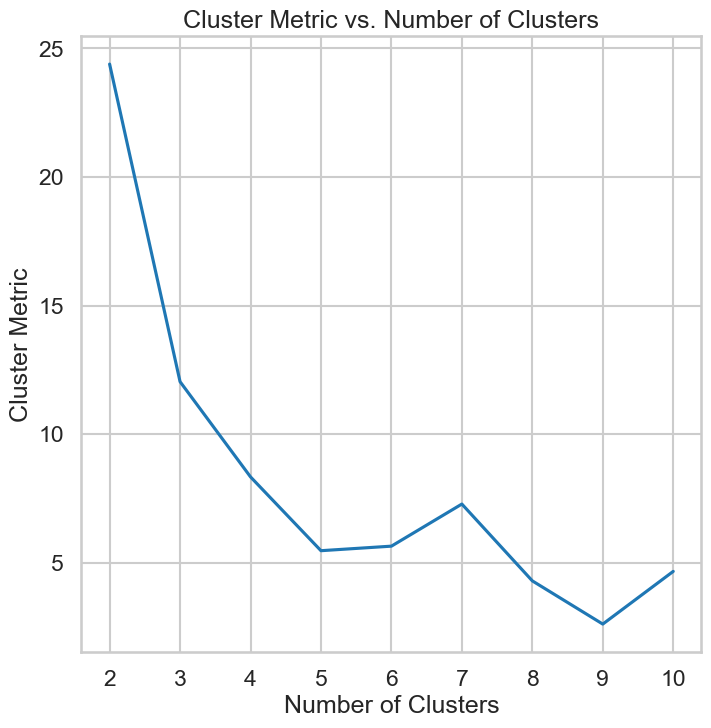

In [14]:
# Plot Cluster Metric against num_clusters_range
plt.plot(num_clusters_range, cluster_metrics)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. Number of Clusters')
plt.show()

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [15]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [16]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

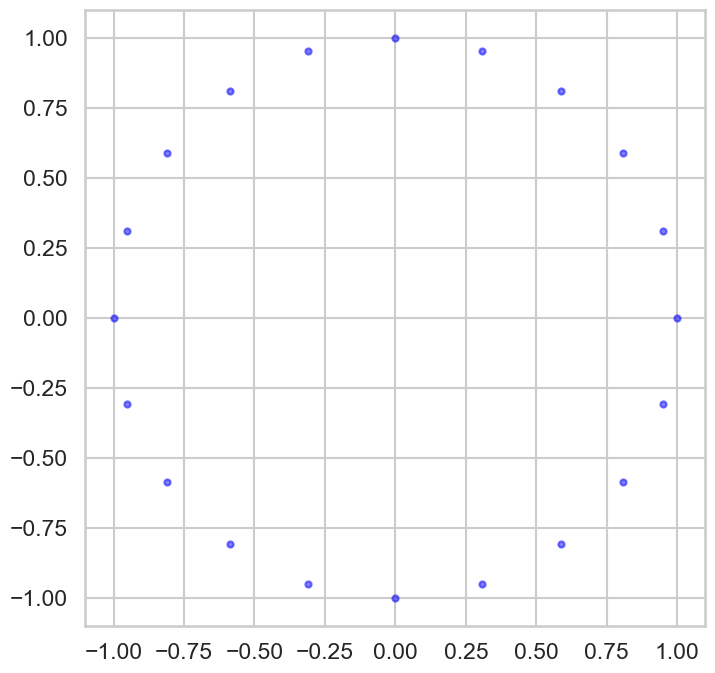

In [17]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

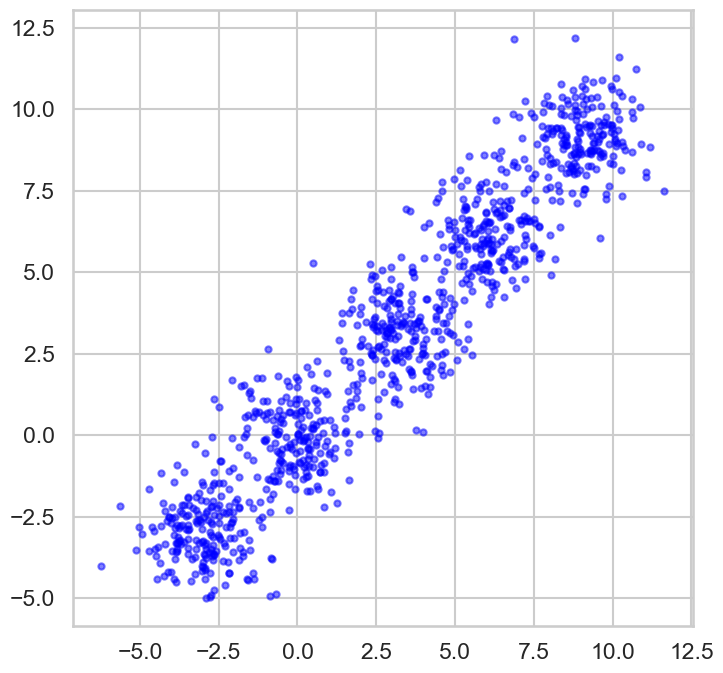

In [18]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

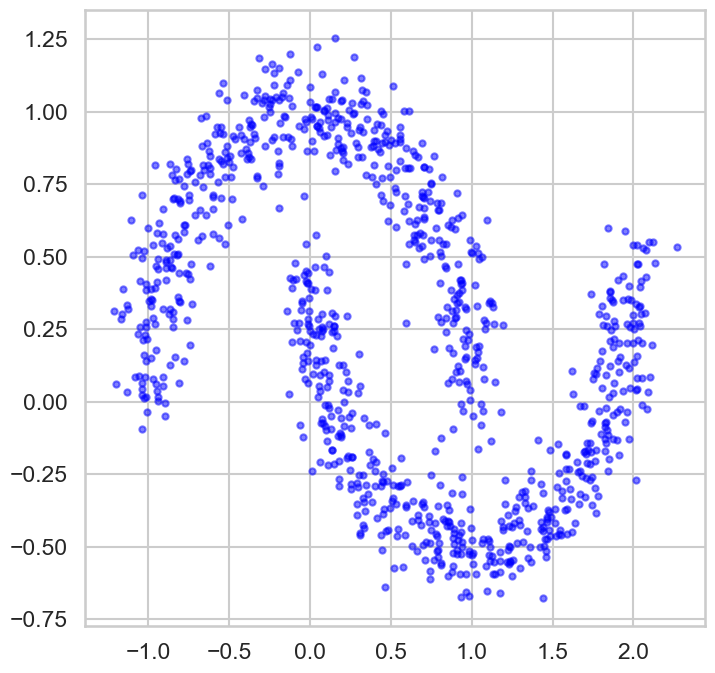

In [19]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

# Example 2

In [20]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

In [21]:
Data_points = X
num_clusters_range = list(range(2, 11))
cluster_metrics = []
#Distance_Type ='Ecluidian'
for Number_of_Clusters in num_clusters_range:
    print(np.random.choice(len(Data_points), Number_of_Clusters, replace=False).shape[0])
    [Final_Cluster_Distance , Cluster_Metric ] = GUC_Kmean ( Data_points, Number_of_Clusters)
    cluster_metrics.append(Cluster_Metric)


2
3
4
5
6
7
8
9
10


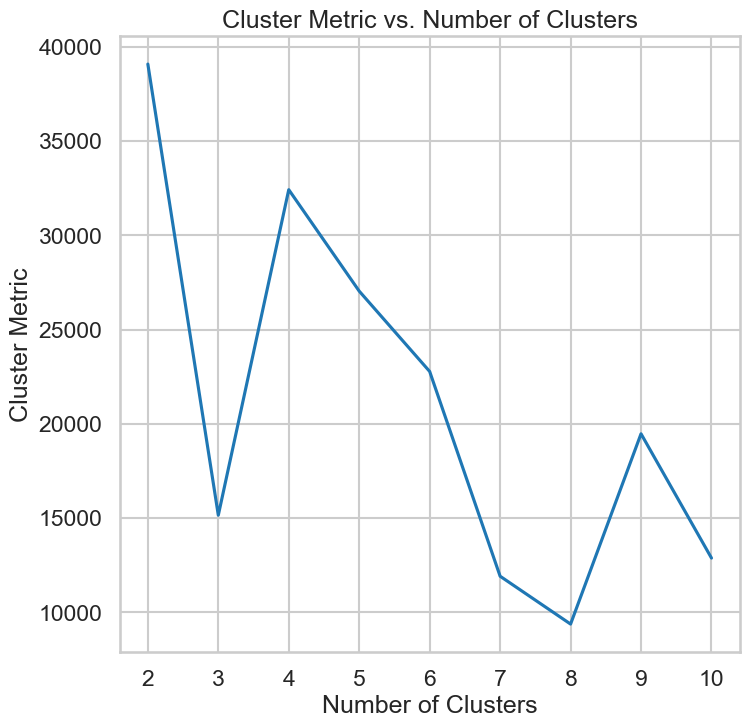

In [22]:
# Plot Cluster Metric against num_clusters_range
plt.plot(num_clusters_range, cluster_metrics)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. Number of Clusters')
plt.show()

# Example 3

In [23]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)

In [24]:
Data_points = X
num_clusters_range = list(range(2, 11))
cluster_metrics = []
#Distance_Type ='Ecluidian'
for Number_of_Clusters in num_clusters_range:
    print(np.random.choice(len(Data_points), Number_of_Clusters, replace=False).shape[0])
    [Final_Cluster_Distance , Cluster_Metric ] = GUC_Kmean ( Data_points, Number_of_Clusters)
    cluster_metrics.append(Cluster_Metric)

2
3
4
5
6
7
8
9
10


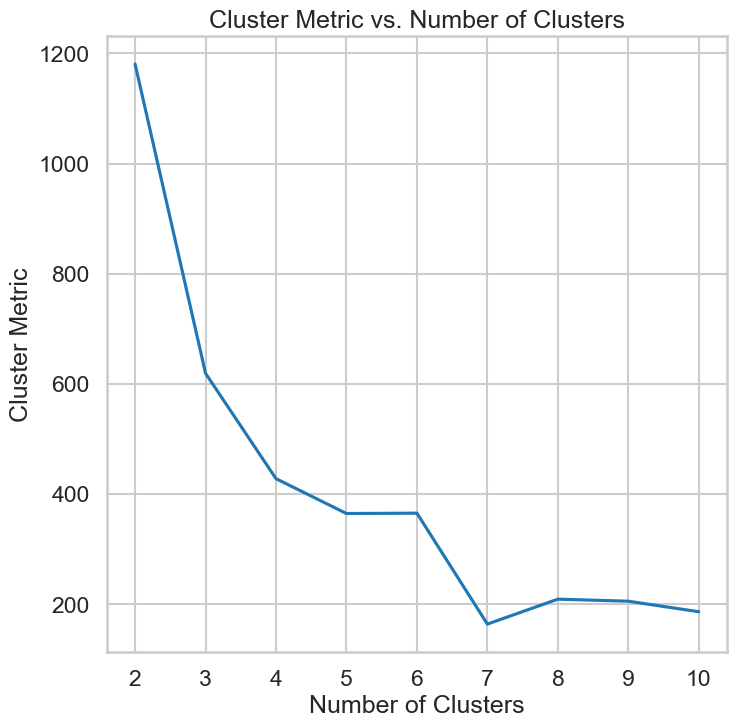

In [25]:
# Plot Cluster Metric against num_clusters_range
plt.plot(num_clusters_range, cluster_metrics)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. Number of Clusters')
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [30]:
data_dir = "M:/Education/10th Semester/Machine Learning/Assignment/"
df = pd.read_csv("Customer data.csv")
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [32]:
data_matrix = df.values
data_matrix

array([[100000001,         0,         0, ...,    124670,         1,
                2],
       [100000002,         1,         1, ...,    150773,         1,
                2],
       [100000003,         0,         0, ...,     89210,         0,
                0],
       ...,
       [100001998,         0,         0, ...,     86400,         0,
                0],
       [100001999,         1,         1, ...,     97968,         0,
                0],
       [100002000,         0,         0, ...,     68416,         0,
                0]], dtype=int64)

In [34]:
Data_points = data_matrix
num_clusters_range = list(range(2, 11))
cluster_metrics = []
#Distance_Type ='Ecluidian'
for Number_of_Clusters in num_clusters_range:
    print(np.random.choice(len(Data_points), Number_of_Clusters, replace=False).shape[0])
    [Final_Cluster_Distance , Cluster_Metric ] = GUC_Kmean ( Data_points, Number_of_Clusters)
    cluster_metrics.append(Cluster_Metric)

2
3
4
5
6
7
8
9
10


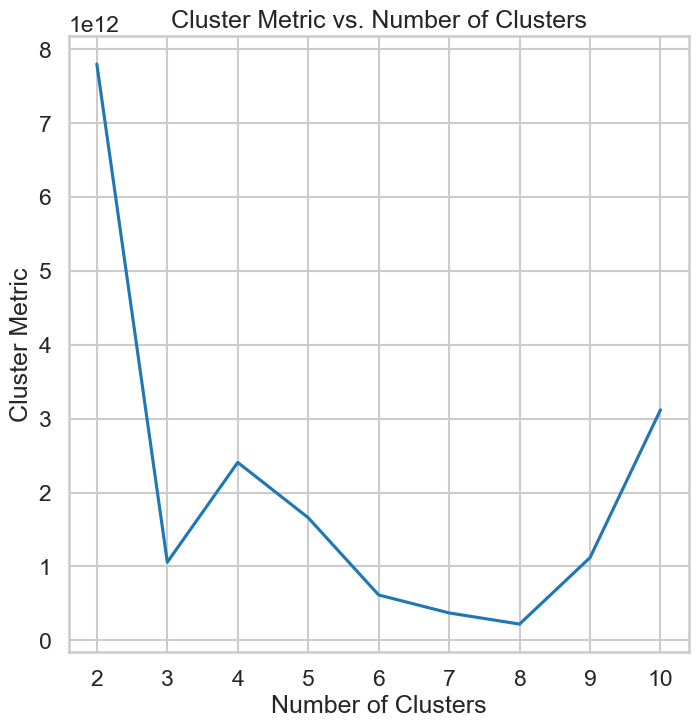

In [35]:
# Plot Cluster Metric against num_clusters_range
plt.plot(num_clusters_range, cluster_metrics)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. Number of Clusters')
plt.show()